In [1]:
#Importing modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#loading dataset
df = pd.read_csv("volve_production_data.csv",index_col=0,parse_dates=True)
#df.head()

In [81]:
#Spliting the dataset
df_model_prep = df[df.index.year<=2014] #preparation data
df_model_test = df[df.index.year>=2015] #testing data

In [82]:
#Preparing a data to show only BORE_OIL_VOL per TIME
df_original = df_model_prep.copy()
df = df_original.loc[:,['BORE_OIL_VOL']]
#df.head()

In [85]:
#Function to reducing the spikes and noise
#n_lags are amount of columns 

window = 60

def ts_to_xy(df,n_lags, window=window):
    
    for i in range(1,n_lags+1):
        df[f'y_{i}'] = 0
        df[f'y_{i}'] = df['BORE_OIL_VOL'].shift(i+window)
        
    return df


In [86]:
#Smoothing values with the mean (on each 30 days)
df_xy = ts_to_xy(df.rolling('30D').mean(),1)

In [88]:
df_xy.head()

,BORE_OIL_VOL,y_1
2007-01-09,0.0,NaN
2007-01-10,0.0,NaN
2007-01-11,0.0,NaN
2007-01-12,0.0,NaN
2007-01-13,0.0,NaN


In [89]:
#Filling the NaN valeus
df_xy = df_xy.fillna(method='bfill')

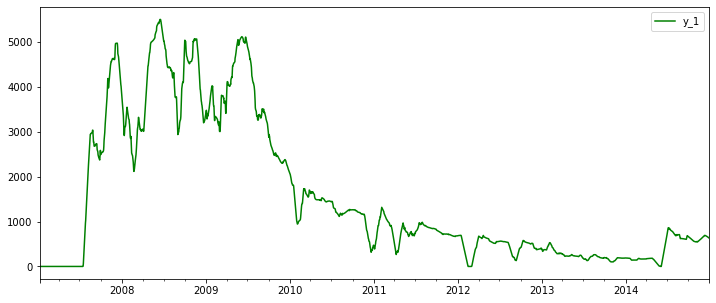

In [96]:
#Plotting the graph
df_xy['y_1'].plot(figsize=(12,5),color='green')
#df_xy['BORE_OIL_VOL'].plot(color='red')
plt.legend()

In [110]:
#Inicializing machine learning training

#Importing modules
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [108]:
#Setting the variables
x = df_xy[[col for col in df_xy.columns if col.startswith('y')]] #will get the time column (index)
y = df_xy['BORE_OIL_VOL']

In [112]:
#Setting with sklearn testing and training variables with 30% of total are test data
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=42,shuffle=False)

In [113]:
#Setting the RandomForest model to fiting x and y values
rf = RandomForestRegressor()
rf.fit(x_train,y_train)

RandomForestRegressor()

In [114]:
#Predicting the values of y with x_train
yp_train = rf.predict(x_train)

Text(0.5, 1.0, 'RMSE = 451.39877530538246')

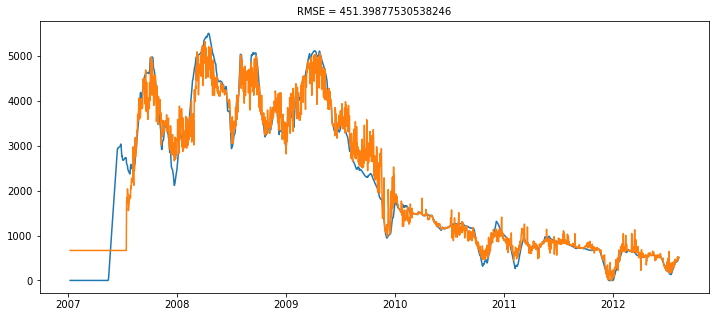

In [115]:
#Plotting graph
plt.figure(figsize=(12,5))
plt.plot(x_train.index,y_train)
plt.plot(x_train.index,yp_train)

#Showing the RMSE
plt.title(f'RMSE = {np.sqrt(mean_squared_error(y_train,yp_train))}',size=10)

C:\Users\Sales\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- BORE_OIL_VOL
Feature names seen at fit time, yet now missing:
- y_1

  warnings.warn(message, FutureWarning)


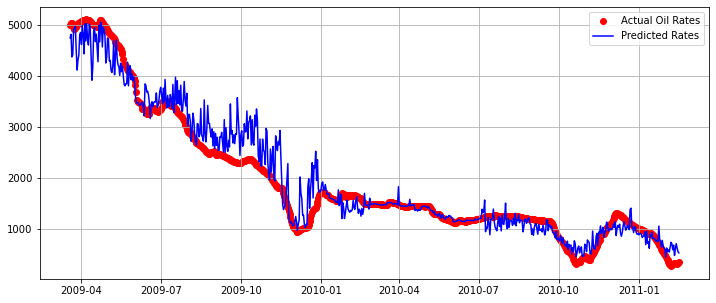

In [121]:
#Checking with non trained values in a period
ti = 800 ; tf = 1500

plt.figure(figsize=(12,5))
plt.scatter(df_xy.index[ti:tf],df_xy['BORE_OIL_VOL'][ti:tf],color='red',label='Actual Oil Rates')
plt.plot(df_xy.index[ti:tf],rf.predict(df_xy[['BORE_OIL_VOL']][ti-window:tf-window]),color='blue',label='Predicted Rates')
plt.grid()
plt.legend()

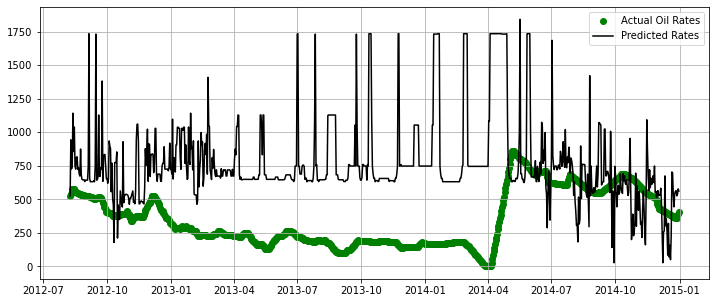

In [124]:
#Predicting values for test with x_test
yp_test = rf.predict(x_test)

#Plotting graph
plt.figure(figsize=(12,5))
plt.scatter(x_test.index,y_test,color='green',label='Actual Oil Rates')
plt.plot(x_test.index,yp_test,color='black',label='Predicted Rates')
plt.grid()
plt.legend()

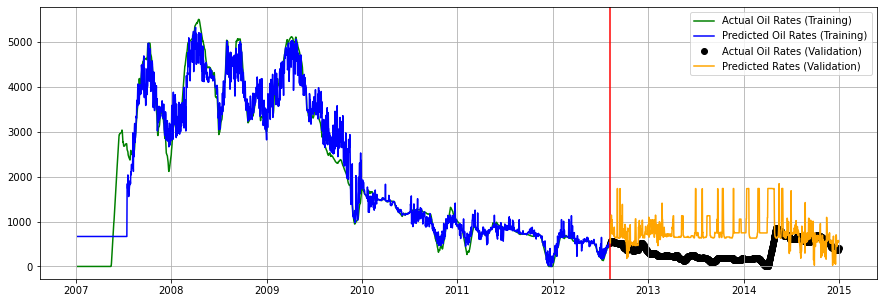

In [127]:
#Combining the test and training version

plt.figure(figsize=(15,5))

#Training Values
plt.plot(x_train.index,y_train, color='green',label='Actual Oil Rates (Training)')
plt.plot(x_train.index,yp_train, color='blue',label='Predicted Oil Rates (Training)')

#Delimiter
plt.axvline(x_test.index[0],color='red')

#Test Values (Validation)
plt.scatter(x_test.index,y_test,color='black',label='Actual Oil Rates (Validation)')
plt.plot(x_test.index,yp_test,color='orange',label='Predicted Rates (Validation)')

plt.grid()
plt.legend()

In [170]:
#Forecasting and predicting
last_input_rates = x_test.copy()
last_input_rates = last_input_rates[-window:]
next_forecasts = rf.predict(last_input_rates)

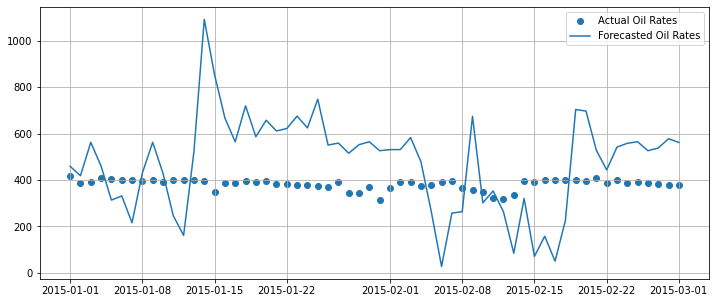

In [174]:
#Plotting graph of forecasted data
plt.figure(figsize=(12,5))
plt.scatter(df_model_test.index[:window],df_model_test['BORE_OIL_VOL'][:window],label='Actual Oil Rates')
plt.plot(df_model_test.index[:window],next_forecasts,label='Forecasted Oil Rates')
plt.grid()
plt.legend()

Text(0.5, 0, 'Date')

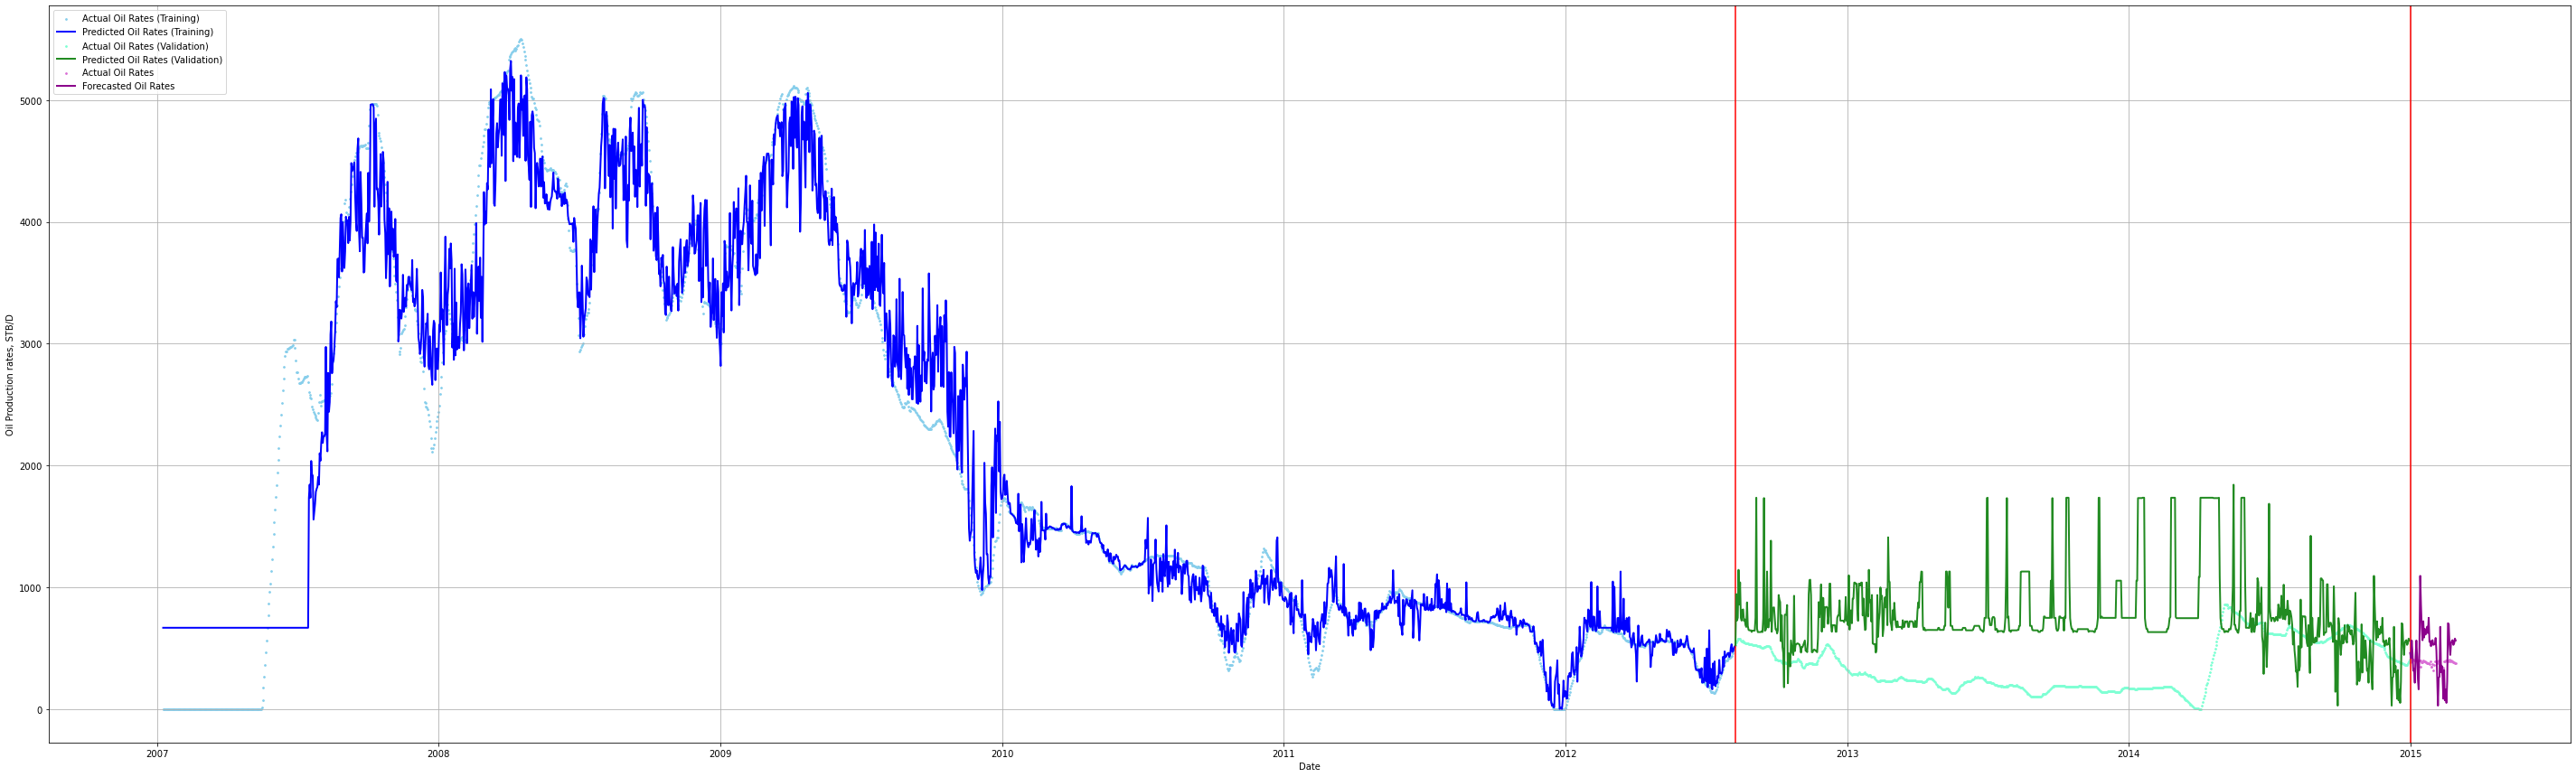

In [196]:
#Results

#Plotting training, validation and forecasting data

plt.figure(figsize=(50,15))

#Training
plt.scatter(x_train.index,y_train,label='Actual Oil Rates (Training)',color='skyblue', s=3)
plt.plot(x_train.index,yp_train,label='Predicted Oil Rates (Training)',color='blue', linewidth=2.0)

plt.axvline(x_test.index[0],color='red')

#Validation
plt.scatter(x_test.index,y_test,label='Actual Oil Rates (Validation)',color='aquamarine',s=3)
plt.plot(x_test.index,yp_test,label='Predicted Oil Rates (Validation)',color='forestgreen',linewidth=2.0)

plt.axvline(df_model_test.index[0],color='red')

#Forecasting
plt.scatter(df_model_test.index[:window],df_model_test['BORE_OIL_VOL'][:window],label='Actual Oil Rates',color='orchid',s=3)
plt.plot(df_model_test.index[:window],next_forecasts,label='Forecasted Oil Rates',color='darkmagenta',linewidth=2.0)

plt.grid()
plt.legend()
plt.ylabel('Oil Production rates, STB/D', size=10);
plt.xlabel('Date', size=10)

